In [1]:
%matplotlib widget
import matplotlib.pyplot as plt
import numpy as np 
from numba import jit
from numpy import sin, pi
from pathlib import Path

%reload_ext autoreload
%aimport visualization
%aimport species_transport
%aimport parameters
from parameters import *
from fluid_flow import dt_fluid_flow
from visualization import plot_species_overview, plot_velocity_vector_field
from species_transport import evolve_species

In [63]:
N, M = 50,50
dx, dy, Ns_c, Nc_lw = parameters.set_resolution(N,M)
dt = dt_fluid_flow(dx, Fo=0.3)

re-load velocity, species and temperature fields

In [120]:
# load the velocity field:
data_vel = Path('data/vel_field') / 'N{}M{}.npy'.format(N,M)
u,v = np.load(data_vel)
#plot_velocity_vector_field(u,v)

data_sp = Path('data/species_ignited') / 'N{}M{}.npy'.format(N,M)
species_data = np.load(data_sp)
Y = species_data[:-1,:, :]
T = species_data[-1, :, :]
#fig, axs =plt.subplots(2, 4, figsize=(7,5.),sharex=True, sharey=True)
#plot_species_overview(Y,T, axs=axs)

Once the ignition has stabilized, add the temperature evolution:

In [125]:
#Nt = int(200 * 3.2e-5 / dt)
Nt = 200
dt_chem = 2.2857e-7 * 2.65
_dt = 1.0 * dt
print(_dt / dt_chem, dt_chem)

6.738586590559722 6.057105e-07


In [126]:
%time Y, T = evolve_species(Nt, Y, T, _dt, u, v, dx, dy, Ns_c, Nc_lw, chem=True, dt_chem=dt_chem, evolve_T=True);

CPU times: user 19.8 s, sys: 82 ms, total: 19.9 s
Wall time: 19.8 s


We see a hot spot is created in the middle of the chamber (we still need to find the stationnary state).

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
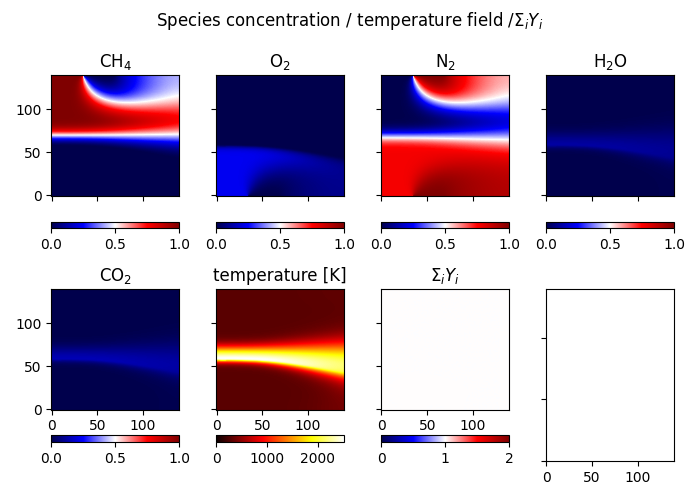

In [127]:
%autoreload 1
fig, axs =plt.subplots(2, 4, figsize=(7,5.),sharex=True, sharey=True)
plot_species_overview(Y,T, axs=axs)

Comments:
* I tested the `dt` and `dt_chem` parameters for stability in the last combustion phase
* Result: if we keep the same `dt` as before, we have for this particular case where $N,M = (50,50)$ that `dt / dt_chem` $\ge$ 280 is safe. We have to check how this behaves for higher values of $N,M$.
* Alternatively, one may reduce `dt` with respect to the 'old' one, and increase `dt_chem` at the same time. I don't know yet which option is more efficient.
* for $N=30$ we have to reduce `dt_chem` a bit to `4.5714e-08 s` ( i.e by a factor 2/5) for the system to be stable